## Data exploration

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
plt.style.use('seaborn-white')

In [2]:
# Leggiamo il dataframe dal file csv 'acquisti.csv'
acquisti = pd.read_csv('acquisti.csv', sep=',')
acquisti.drop(columns=['Unnamed: 0'], inplace=True)
acquisti.head(3)

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,Spending
0,536365,2010-12-01 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,15.30
1,536365,2010-12-01 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6,20.34
2,536365,2010-12-01 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,22.00


In [3]:
# I valori della colonna BasketDate sono in formato stringa, per comodità le trasformiamo in formato datetime
acquisti['BasketDate'] = pd.to_datetime(acquisti['BasketDate'], format="%Y-%m-%d %H:%M:%S")

### Periodo di osservazione

Il dataset contiene acquisti effettuati tra il 1 dicembre 2010 e il 9 dicembre 2011.

In [4]:
acquisti['BasketDate'].min()

Timestamp('2010-12-01 08:26:00')

In [5]:
acquisti['BasketDate'].max()

Timestamp('2011-12-09 12:50:00')

### Prodotti più comprati

Osserviamo quali sono i 10 prodotti più acquistati durante il periodo di osservazione.

In [6]:
acquisti['ProdDescr'].value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    1994
REGENCY CAKESTAND 3 TIER              1656
JUMBO BAG RED RETROSPOT               1586
ASSORTED COLOUR BIRD ORNAMENT         1390
PARTY BUNTING                         1370
LUNCH BAG RED RETROSPOT               1284
SET OF 3 CAKE TINS PANTRY DESIGN      1134
LUNCH BAG  BLACK SKULL.               1062
PACK OF 72 RETROSPOT CAKE CASES       1045
SPOTTY BUNTING                        1012
Name: ProdDescr, dtype: int64

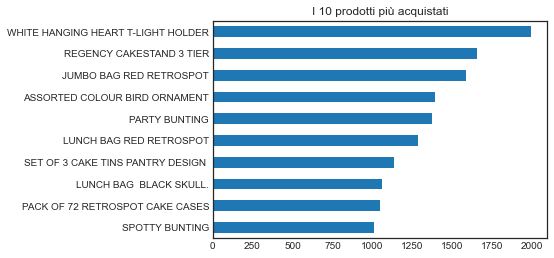

In [7]:
acquisti['ProdDescr'].value_counts(ascending=True).tail(10).plot(kind='barh', title='I 10 prodotti più acquistati')

### Mesi in cui sono stati fatti più acquisti

Osserviamo quali sono i mesi in cui sono stati effettuati più acquisti durante il periodo di osservazione. Escludiamo gli acquisti fatti nel mese di dicembre 2011 perché sono relativi solo ai primi 9 giorni del mese (il mese di dicembre 2011 sembra essere incompleto).

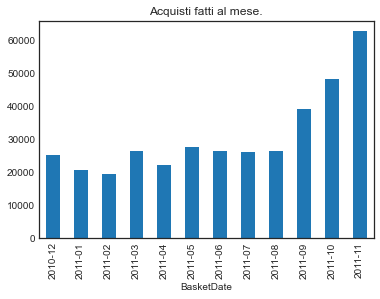

In [8]:
acquisti_no_dicembre_2011 = acquisti[acquisti['BasketDate'] < '2011/12/01']
tmp = acquisti_no_dicembre_2011.groupby(acquisti['BasketDate'].dt.to_period('M')).count()['BasketDate']
tmp.plot(kind='bar', title='Acquisti fatti al mese.')

Si nota che nel mese di novembre 2011 sono stati effettuati più acquisti.

### Giorni della settimana in cui si fanno più acquisti

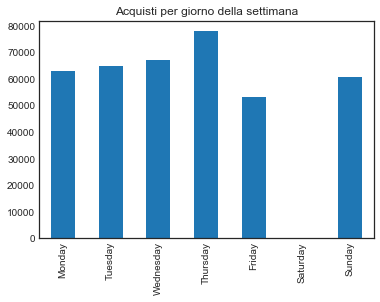

In [9]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
acquisti['BasketDate'].dt.day_name().value_counts().reindex(cats).plot(kind='bar', title='Acquisti per giorno della settimana')

Si nota che il giovedì in cui sono stati effettuati più acquisti. Non risultano esserci acquisti effettuati di sabato, probabilmente perché non vengono registrati il sabato.

### Ore del giornio in cui si fanno più acquisti

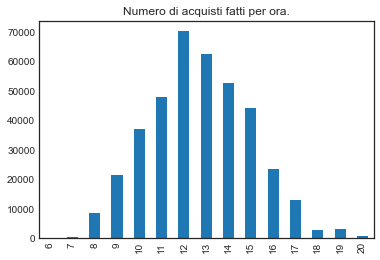

In [10]:
acquisti['BasketDate'].dt.hour.value_counts(sort=False).plot(kind='bar', title='Numero di acquisti fatti per ora.')

Si nota che tra le ore 10 e le 15 vengono effettuati più acquisti.

### Paesi da cui si fanno più acquisti

Dato che ci interessa sapere da quali paesi vengono fatti gli acquisti, escludiamo gli acquisti che hanno come CustomerCountry = 'Unspecified'.

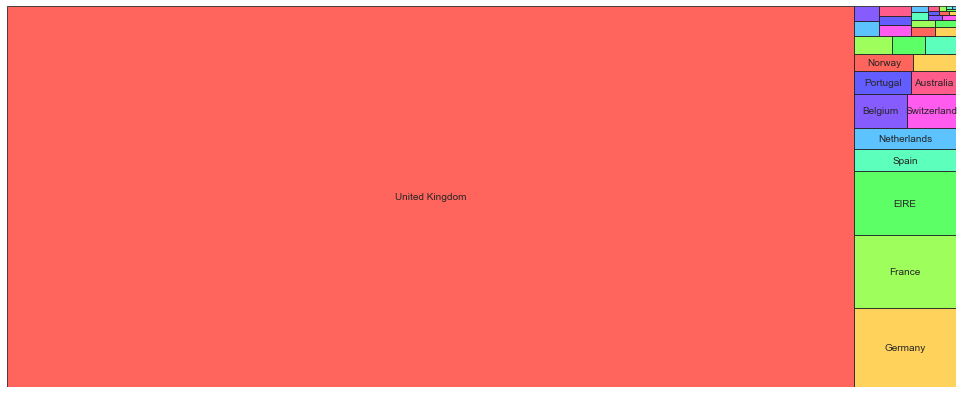

In [11]:
acquisti_no_unspecified = acquisti[acquisti['CustomerCountry'] != 'Unspecified']

color=['#FF3F33','#FFC733','#86FF33','#33FF3F', '#33FFAC', '#33B5FF', '#6833FF', '#FF33EC', '#3C33FF', '#FF336E']
fig, ax = plt.subplots(1, figsize = (17,7))
squarify.plot(sizes=acquisti_no_unspecified['CustomerCountry'].value_counts(), 
              label=acquisti_no_unspecified['CustomerCountry'].value_counts().index[:11], 
              alpha=0.8, color=color, bar_kwargs=dict(linewidth=1, edgecolor="#222222"))

plt.axis('off')
plt.show()

Si nota che la maggior parte dei clienti proviene dal Regno Unito, e in misura minore da Germania, Francia e Irlanda.

In [12]:
acquisti_no_unspecified['CustomerCountry'].value_counts()

United Kingdom          345572
Germany                   8574
France                    7950
EIRE                      6921
Spain                     2389
Netherlands               2312
Belgium                   1928
Switzerland               1802
Portugal                  1410
Australia                 1111
Norway                    1039
Channel Islands            743
Italy                      729
Finland                    647
Cyprus                     598
Sweden                     423
Austria                    384
Denmark                    364
Poland                     323
Japan                      320
Israel                     245
Singapore                  215
Iceland                    182
Canada                     150
Greece                     142
Malta                      107
United Arab Emirates        67
USA                         67
RSA                         57
European Community          57
Lebanon                     45
Lithuania                   35
Brazil  

### Numero medio di prodotti uguali acquistati per carrello

Possiamo osservare quanti prodotti uguali vengono acquistati in media per carrello. (Esempio: nel mio carello ho il prodotto A con quantità 2 e il prodotto B con quantità 6. In media quindi acquisto 4 unità per ogni prodotto in questo carrello).

In [13]:
acquisti.groupby('BasketID').mean()['Qta'].quantile(.90)

44.0

Dato che il 90% dei valori ottenuti è minore o uguale di 44.0, scegliamo per l'istogramma range = [0, 45] e bins=45.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CAA48B3AC0>]],
      dtype=object)

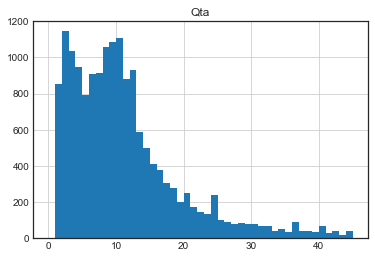

In [14]:
acquisti.groupby('BasketID').mean().hist(column='Qta', bins=45, range=[0, 45], figsize=(6,4))

Molti clienti tendono ad acquistare dalle 1 alle 15 unità per prodotto. Inoltre, si notano nel grafico due picchi in corrispondenza circa dei valori 2 e 13.

### Quantità totale per carrello

Possiamo osservare la quantità totale di prodotti acquistati per carrello. (Esempio: se nel mio carrello ho un prodotto A con quantità 2 e un prodotto B con quantità 10, allora ho acquistato in totale 12 prodotti).

In [15]:
acquisti.groupby('BasketID').sum()['Qta'].quantile(.90)

505.0

Dato che il 90% dei valori ottenuti è minore o uguale di 505.0, scegliamo per l'istogramma range = [0, 510] e bins=102.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CAA4A26DF0>]],
      dtype=object)

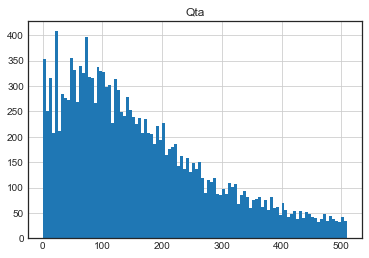

In [16]:
acquisti.groupby('BasketID').sum().hist(column='Qta', bins=102, range=[0,510], figsize=(6,4))

La maggior parte delle persone tende ad acquistare meno di 200 oggetti per carrello.

### Spesa media per prodotto acquistato

Possiamo osservare la spesa media per prodotto acquistato.

In [17]:
acquisti.groupby('BasketID').mean()['Spending'].quantile(.90)

82.84666666666672

Dato che il 90% dei valori ottenuti è minore o uguale di 82.84, scegliamo per l'istogramma range = [0, 85] e bins=85.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CAA8C69190>]],
      dtype=object)

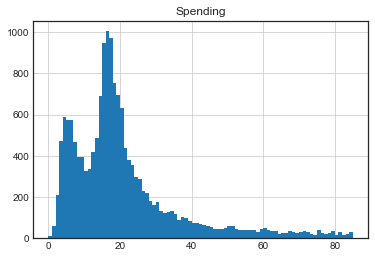

In [18]:
acquisti.groupby('BasketID').mean().hist(column='Spending', bins=85, range=[0,85], figsize=(6,4))

Nel grafico si notano due picchi in corrispondenza circa dei valori 5 e 18.

### Spesa totale per carrello

Possiamo osservare la spesa totale per carrello.

In [19]:
acquisti.groupby('BasketID').sum()['Spending'].quantile(.90)

789.9640000000002

Dato che il 90% dei valori ottenuti è minore o uguale di 789.96, scegliamo per l'istogramma range = [0, 800] e bins=100.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CAA8D9B160>]],
      dtype=object)

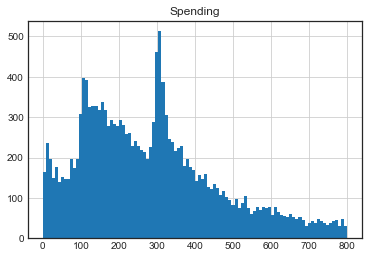

In [20]:
acquisti.groupby('BasketID').sum().hist(column='Spending', bins=100, range=[0,800], figsize=(6,4))

Nel grafico si notano due picchi in corrispondenza dei valori 100 e 300.

### Pairwise correlation

In [21]:
acquisti[['Sale', 'Qta', 'Spending']].corr()

,Sale,Qta,Spending
Sale,1.000000,-0.088281,0.094269
Qta,-0.088281,1.000000,0.653559
Spending,0.094269,0.653559,1.000000


Si nota una leggera correlazione tra gli attributi Qta e Spending. Questa è dovuta al fatto che una maggior quantità di prodotti acquistati implica una maggiore spesa (Spending = Qta * Sale).